# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# Data Description 
## The dataset contains the following columns:
* Country: Represents the name of each country in the dataset.
* Child Mortality (child_mort): The number of child deaths per 1,000 live births.
* Exports: Percentage of a country's GDP that comes from exports.
* Health: Percentage of a country's GDP spent on healthcare.
* Imports: Percentage of a country's GDP that goes into imports.
* Income: The average income of citizens in the country.
* Inflation: The annual inflation rate of the country.
* Life Expectancy (life_expec): The average life expectancy in years.
* Total Fertility Rate (total_fer): The average number of children born per woman.
* GDP per capita (gdpp): The gross domestic product per capita of the country.

In [4]:
data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.shape

(167, 10)

In [6]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

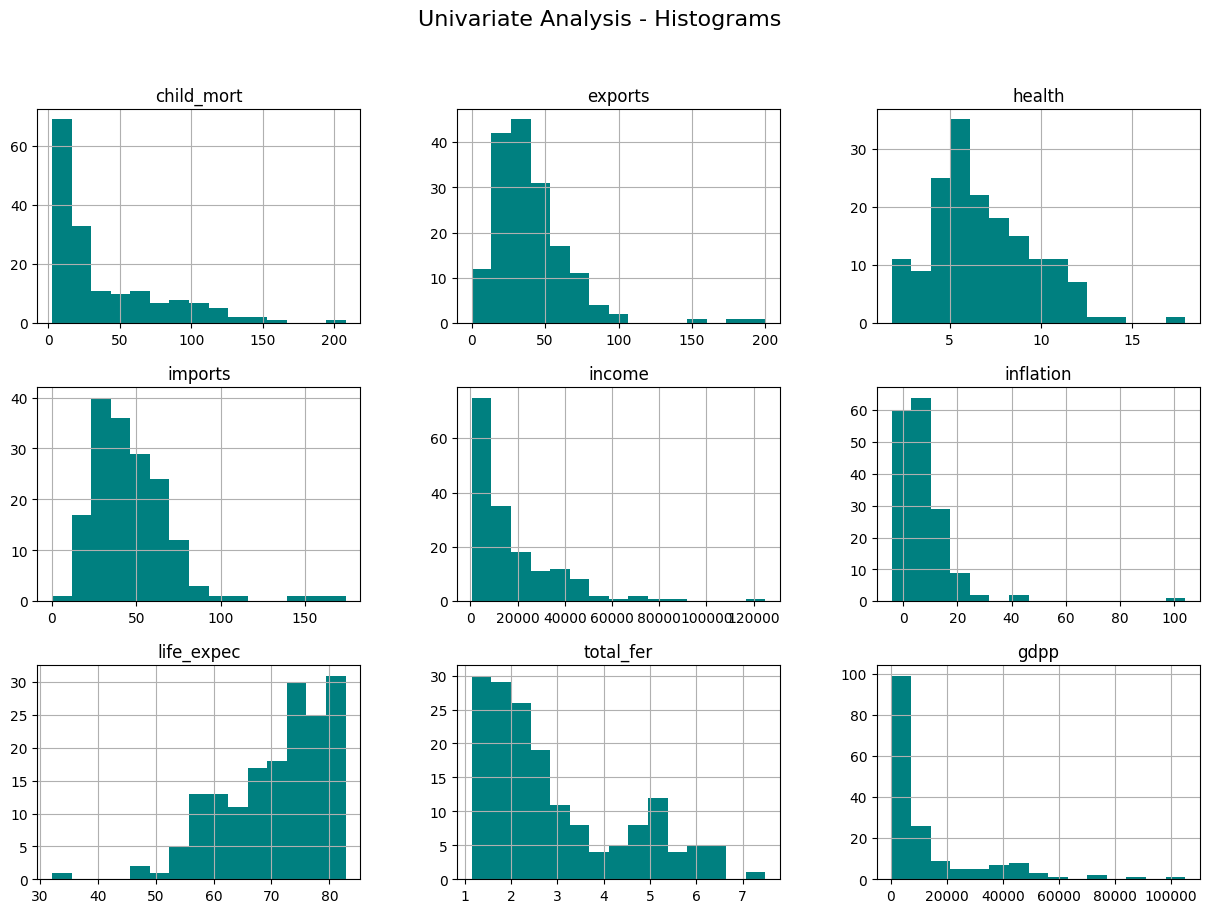

In [13]:
data.hist(bins=15, figsize=(15, 10), color='teal')
plt.suptitle('Univariate Analysis - Histograms', fontsize=16)
plt.show()

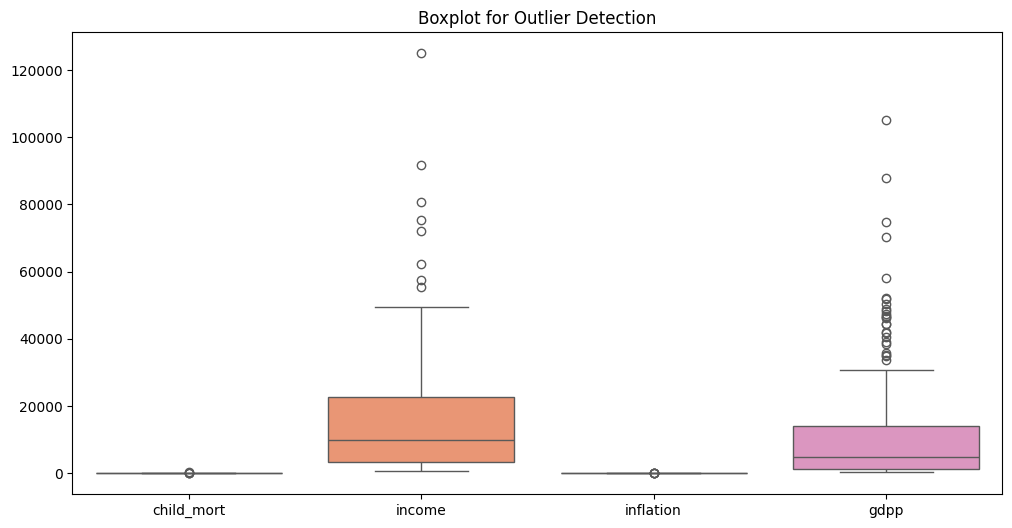

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['child_mort', 'income', 'inflation', 'gdpp']], palette='Set2')
plt.title('Boxplot for Outlier Detection')
plt.show()

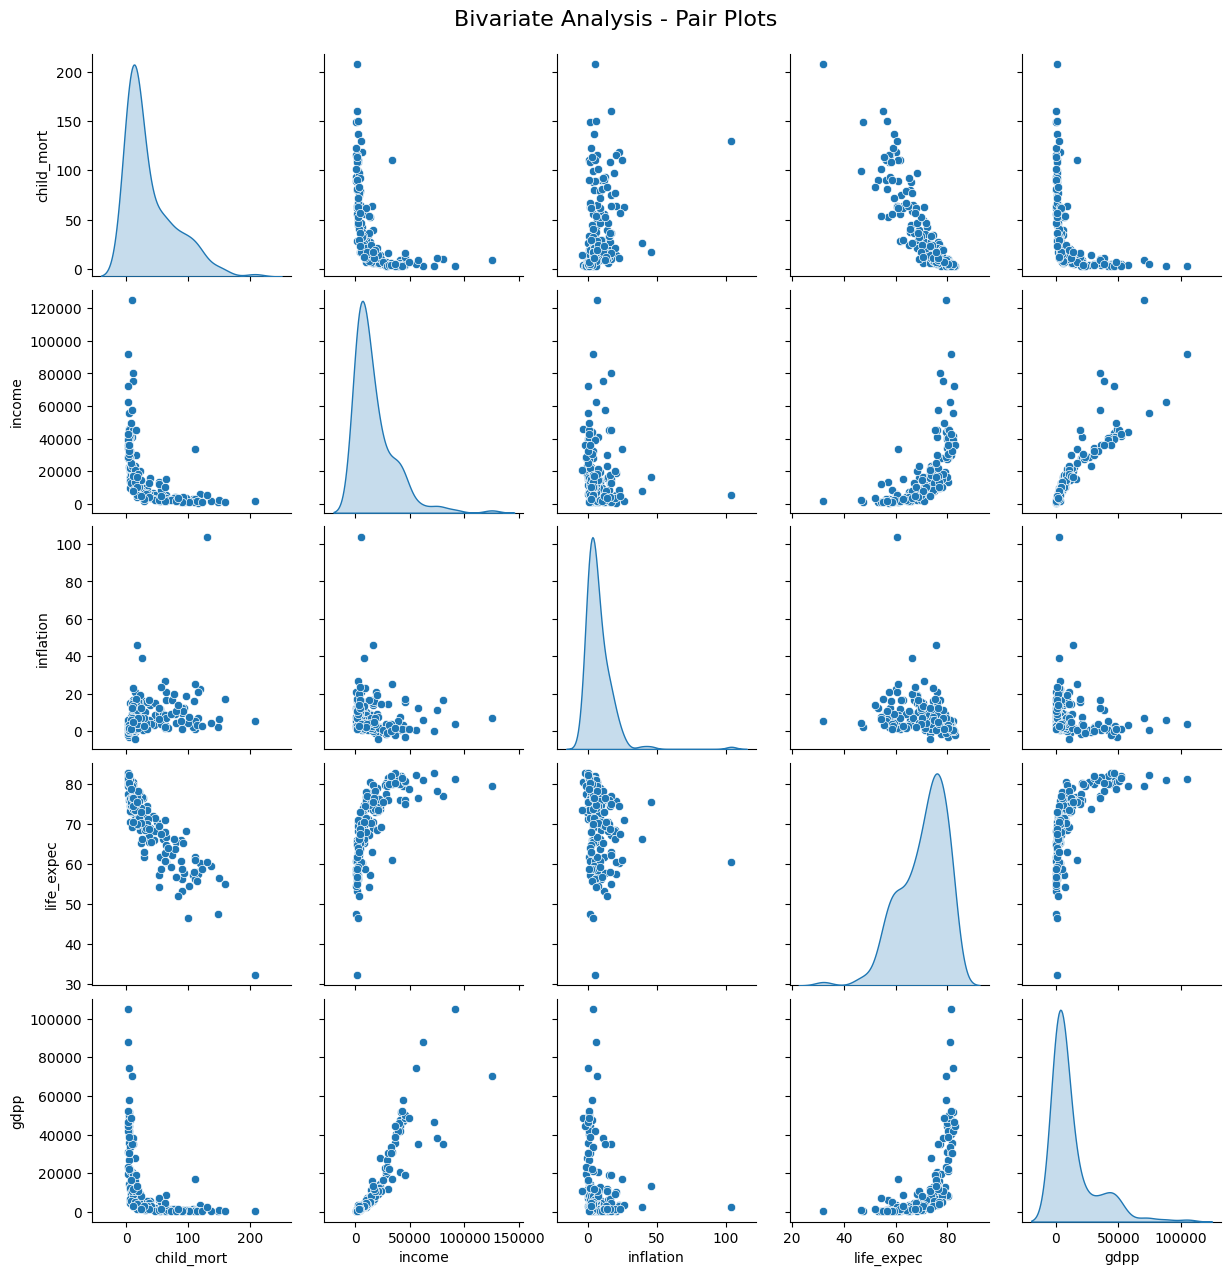

In [15]:
sns.pairplot(data[['child_mort', 'income', 'inflation', 'life_expec', 'gdpp']], diag_kind='kde')
plt.suptitle('Bivariate Analysis - Pair Plots', y=1.02, fontsize=16)
plt.show()

# Life Expectancy vs Income

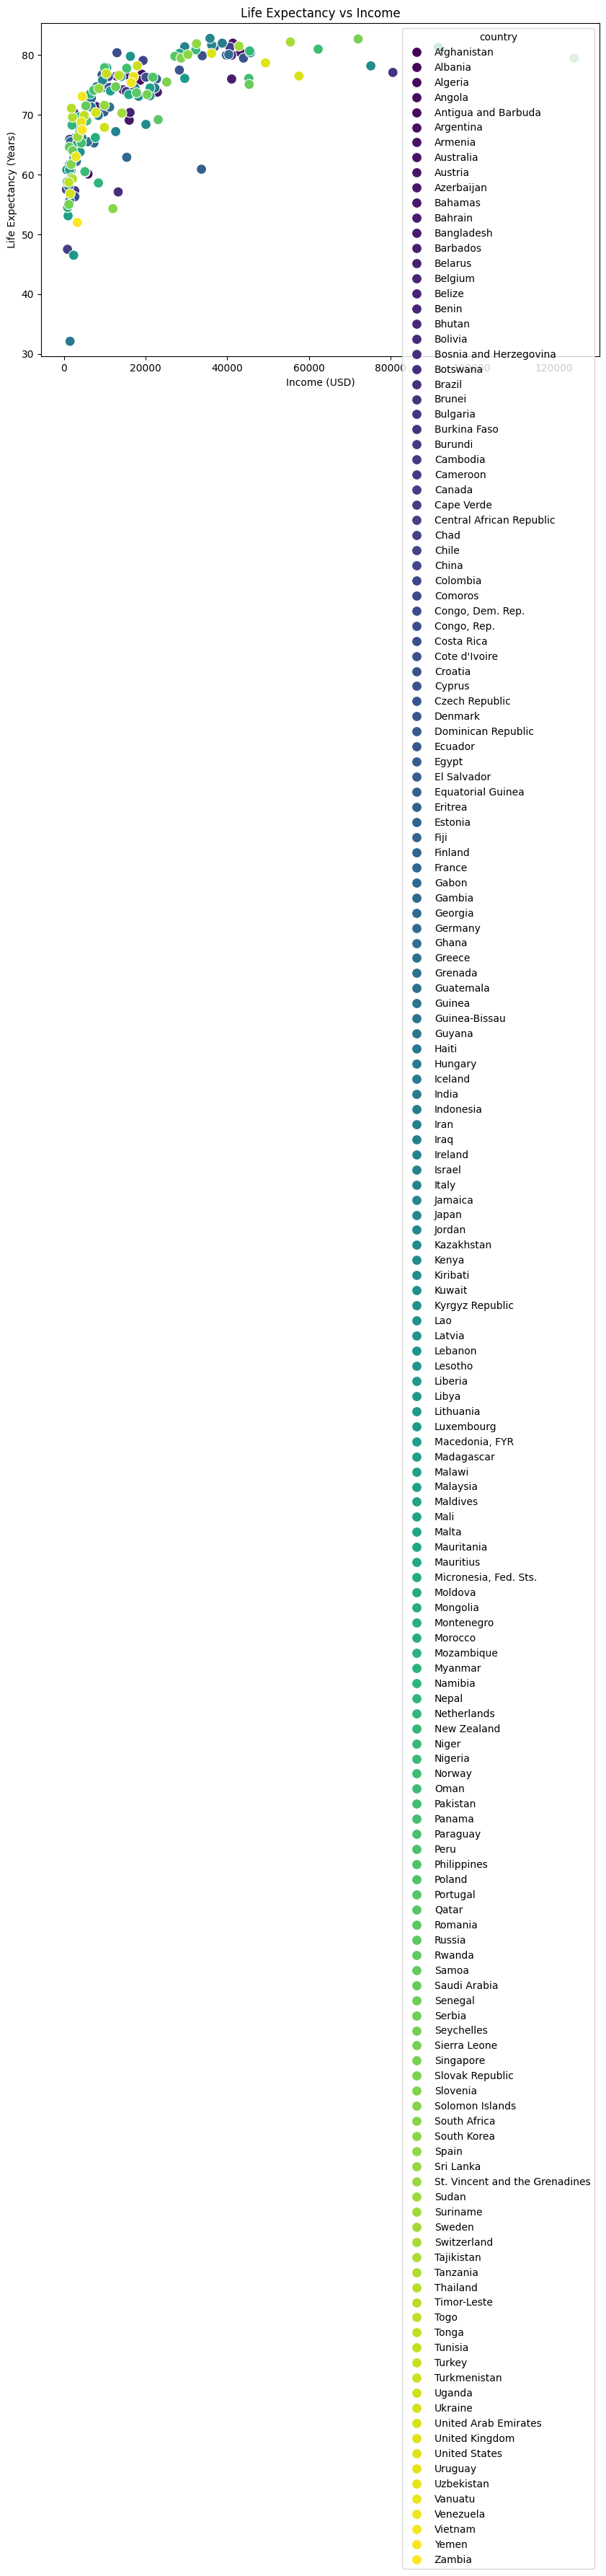

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='income', y='life_expec', hue='country', palette='viridis', s=100)
plt.title('Life Expectancy vs Income')
plt.xlabel('Income (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.show()

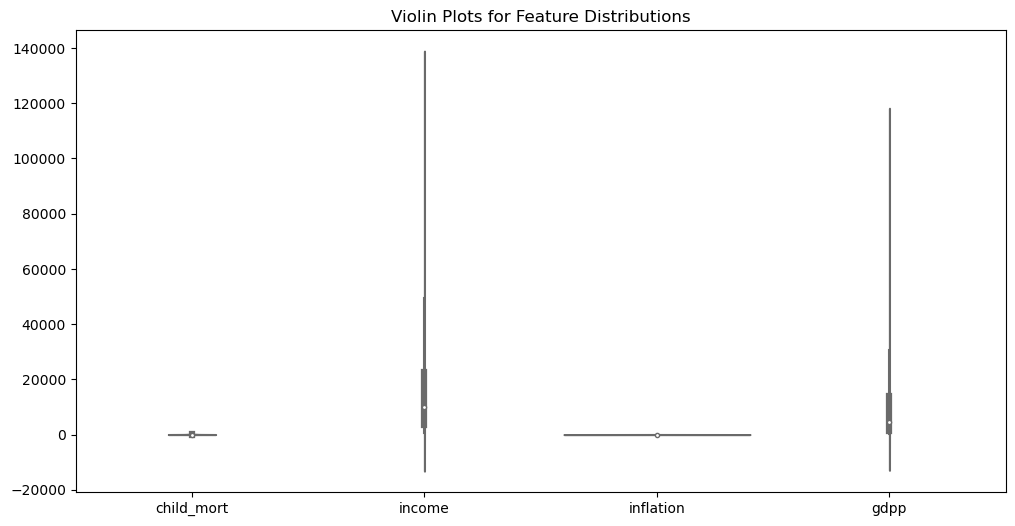

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data[['child_mort', 'income', 'inflation', 'gdpp']], palette='Set3')
plt.title('Violin Plots for Feature Distributions')
plt.show()

# Explore Relationships

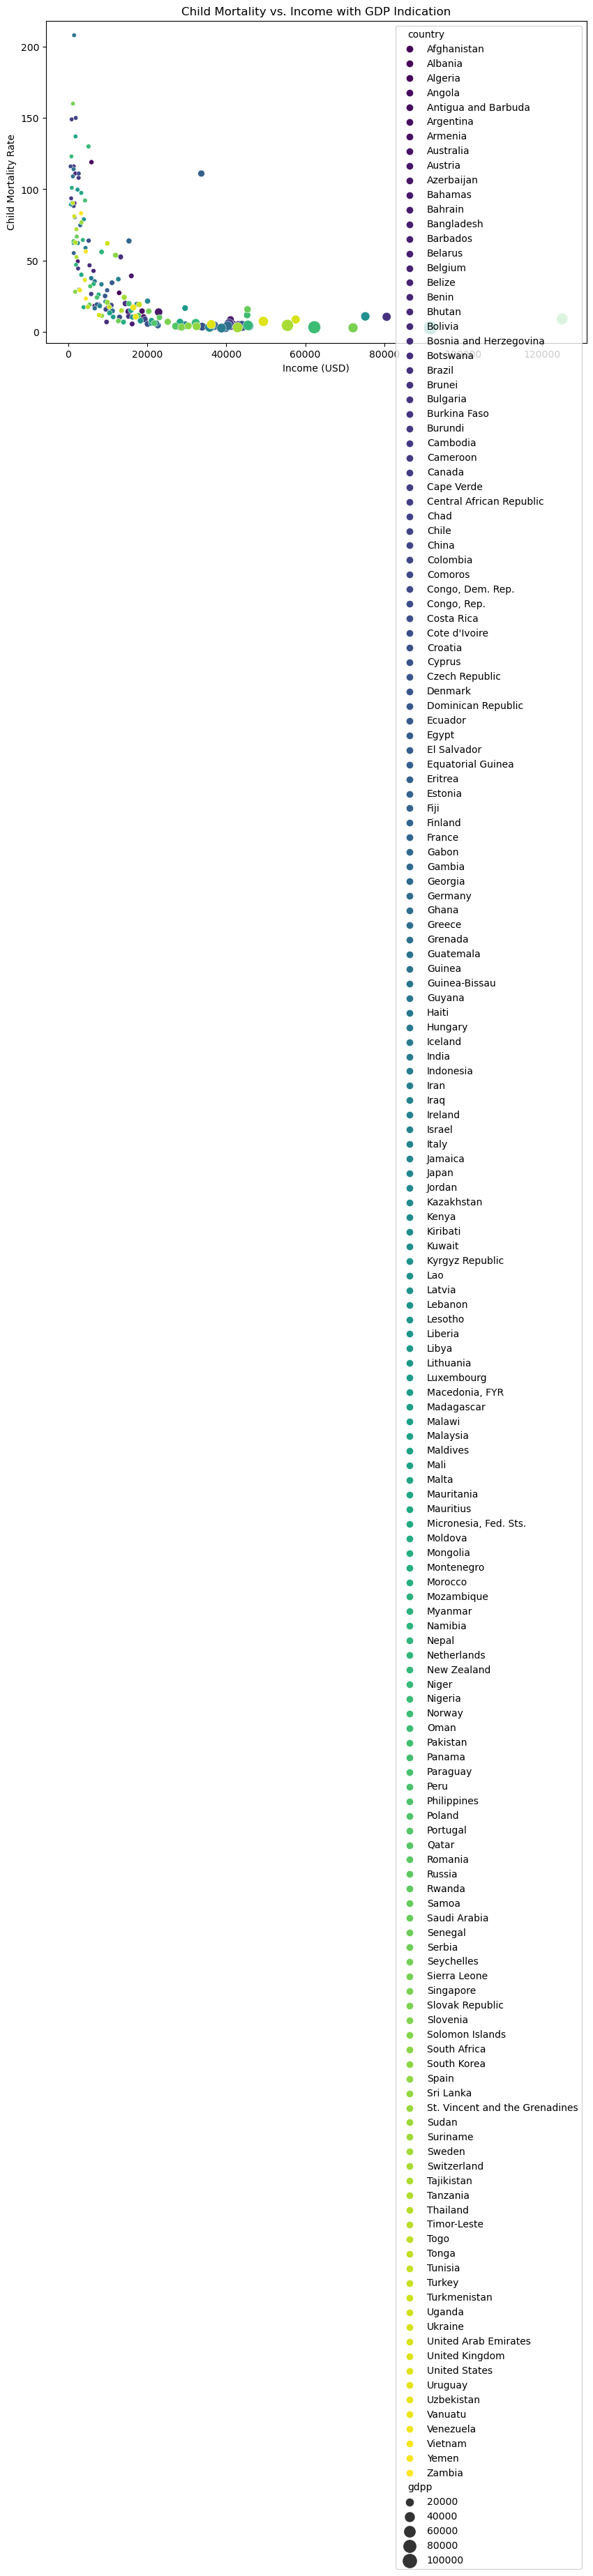

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='income', y='child_mort', hue='country', size='gdpp', sizes=(20, 200), palette='viridis')
plt.title('Child Mortality vs. Income with GDP Indication')
plt.xlabel('Income (USD)')
plt.ylabel('Child Mortality Rate')
plt.show()

# Boxplots with Swarm for Outlier Detection

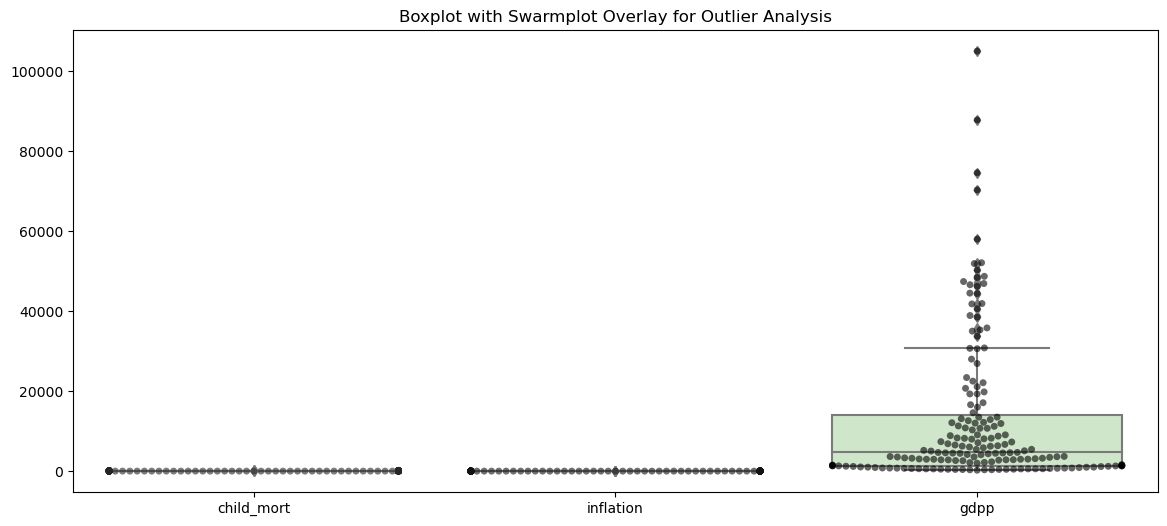

In [21]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[['child_mort', 'inflation', 'gdpp']], palette='Pastel1')
sns.swarmplot(data=data[['child_mort', 'inflation', 'gdpp']], color='black', alpha=0.6)
plt.title('Boxplot with Swarmplot Overlay for Outlier Analysis')
plt.show()

In [17]:
X = data[['child_mort', 'income', 'inflation', 'life_expec', 'gdpp']]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN

In [19]:
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan.fit(X_scaled)

DBSCAN(eps=1.5, min_samples=2)

In [20]:
data['cluster'] = dbscan.labels_ 
print("\nDBSCAN Cluster Labels:\n", data[['country', 'cluster']])


DBSCAN Cluster Labels:
                  country  cluster
0            Afghanistan        0
1                Albania        0
2                Algeria        0
3                 Angola        0
4    Antigua and Barbuda        0
..                   ...      ...
162              Vanuatu        0
163            Venezuela        1
164              Vietnam        0
165                Yemen        0
166               Zambia        0

[167 rows x 2 columns]


In [21]:
cluster_counts = data['cluster'].value_counts()
print("\nCluster Counts:\n", cluster_counts)


Cluster Counts:
 cluster
 0    160
-1      5
 1      2
Name: count, dtype: int64


In [22]:
noise_points = data[data['cluster'] == -1]
print("\nNoise Points Detected:\n", noise_points)


Noise Points Detected:
                country  child_mort  exports  health  imports  income  \
49   Equatorial Guinea       111.0     85.8    4.48     58.9   33700   
66               Haiti       208.0     15.3    6.91     64.7    1500   
91          Luxembourg         2.8    175.0    7.77    142.0   91700   
113            Nigeria       130.0     25.3    5.07     17.4    5150   
123              Qatar         9.0     62.3    1.81     23.8  125000   

     inflation  life_expec  total_fer    gdpp  cluster  
49       24.90        60.9       5.21   17100       -1  
66        5.45        32.1       3.33     662       -1  
91        3.62        81.3       1.63  105000       -1  
113     104.00        60.5       5.84    2330       -1  
123       6.98        79.5       2.07   70300       -1  


In [23]:
neighbors = NearestNeighbors(n_neighbors=5) 
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

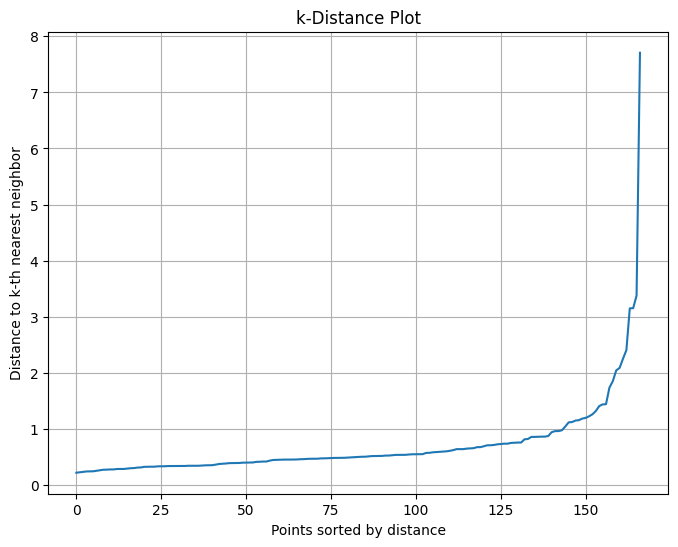

In [24]:
distances = np.sort(distances[:,4], axis=0) 
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('k-Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to k-th nearest neighbor')
plt.grid(True)
plt.show()

# PCA

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [26]:
plt.figure(figsize=(10, 8))
palette = sns.color_palette('husl', len(set(data['cluster'])) - 1)
palette.append('black') 

<Figure size 1000x800 with 0 Axes>

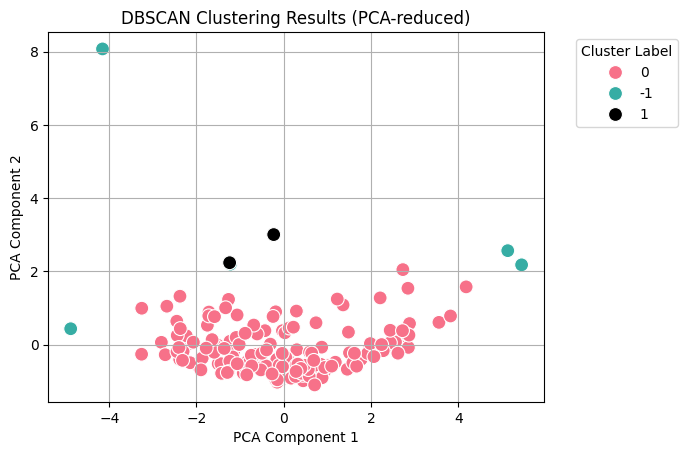

In [27]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster'].astype(str), palette=palette, s=100, edgecolor='w')
plt.title('DBSCAN Clustering Results (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()